In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
from functions_preprocessing import combine_image_folders, erase_double_images, train_test

import functions_licenseplate as fl

import functions_recognition as r

import SVC as svc

import CNN as cnn

import API_car_model as api

## PREPROCESSING

In [2]:
"""
source_folders = [
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS MERI",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS LARA",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Frontal",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Lateral"
]

destination_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
combine_image_folders(source_folders, destination_folder) #ALREADY CREATED
"""

'\nsource_folders = [\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS MERI",\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS",\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS LARA",\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Frontal",\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Lateral"\n]\n\ndestination_folder = \'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\'\ncombine_image_folders(source_folders, destination_folder) #ALREADY CREATED\n'

In [3]:
"""
folder_path = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
erase_double_images(folder_path)
"""

"\nfolder_path = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'\nerase_double_images(folder_path)\n"

In [4]:
"""
source_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'  
train_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'    
test_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'     
val_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'
# Call the train_test function to perform the split
train_test(source_folder, train_folder, test_folder, val_folder)
"""

"\nsource_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'  \ntrain_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'    \ntest_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'     \nval_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'\n# Call the train_test function to perform the split\ntrain_test(source_folder, train_folder, test_folder, val_folder)\n"

## CROP LICENSE PLATE

In [5]:
"""
image_folder_2 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'
cropped_plates_train = yolo.boundingbox(image_folder_2)#dictionary name plate (sequence) + croppedd image
"""

"\nimage_folder_2 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'\ncropped_plates_train = yolo.boundingbox(image_folder_2)#dictionary name plate (sequence) + croppedd image\n"

In [6]:
"""
save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train, save_folder)
"""

"\nsave_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'\nfl.display_and_save_cropped_plates(cropped_plates_train, save_folder)\n"

## CHOOSE RANDOM IMAGE

In [5]:
pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
pc_miguel = 'G://.shortcut-targets-by-id//1xjrivG-T7lph1wnu1KGxnsESEs0U5vvV//LICENSE_PLATES_RECOGITION_L&V//GITHUB_trainset_croppedimages'

file_list = os.listdir(pc_miguel)
image_extensions = ['.jpg', '.jpeg', '.png']
image_files = [file for file in file_list if os.path.splitext(file)[1].lower() in image_extensions]
random_image = random.choice(image_files)
random_image_path = os.path.join(pc_miguel, random_image)

## SEGMENT CHARACTERS

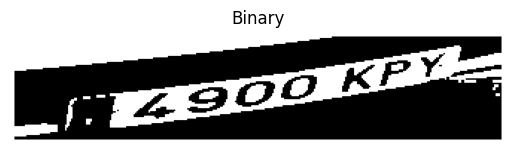

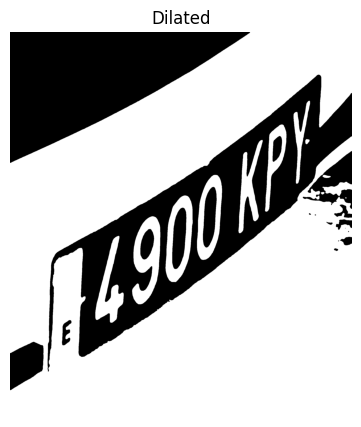

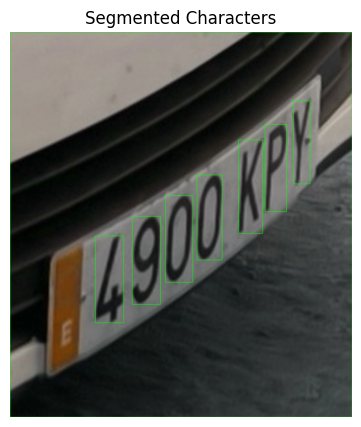

In [6]:
image = cv2.imread(random_image_path)
car = image.copy()

#METHOD 1
m1_chars = r.segment_characters(image)
for idx, char in enumerate(m1_chars):
    plt.subplot(1, len(m1_chars), idx + 1)
    plt.imshow(char, cmap='gray')
    plt.axis('off')
plt.show()

#METHOD 2
upscaled_license_plate, m2_chars = r.OCR_image(license_plate = image, t = 180 ,min_h = 80, min_w = 20, min_ar = 0.2, max_ar = 1.4, area = 6000)

#Choose the best method
best_char = r.best_segmentation_method(m1_chars, m2_chars)

In [13]:
"""for i in range(len(characters)):
  #save the files to expand the dataset
  output_path = os.path.join("G://.shortcut-targets-by-id//1xjrivG-T7lph1wnu1KGxnsESEs0U5vvV//LICENSE_PLATES_RECOGITION_L&V//Dataset Characters", f'caracter_{i}.png')
  cv2.imwrite(output_path, characters[i])"""

## SVC MODEL TRAIN

In [7]:
base_path_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters'
base_path_miguel = 'G://.shortcut-targets-by-id//1xjrivG-T7lph1wnu1KGxnsESEs0U5vvV//LICENSE_PLATES_RECOGITION_L&V//Dataset Characters'

accuracy, clf, scaler, label_encoder = svc.train_svm_and_get_accuracy(base_path_miguel)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 87.21%


## CNN MODEL TRAIN

In [9]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  
    transforms.Resize((28, 28)),                 
    transforms.ToTensor(),                        
    transforms.Normalize((0.5,), (0.5,))         
])

dataset = ImageFolder(root= base_path_miguel, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#print(f"Classes: {dataset.classes}")

num_classes = len(dataset.classes)
model = cnn.CNNModel(num_classes)

criterion = cnn.nn.CrossEntropyLoss() 
optimizer = cnn.optim.Adam(model.parameters(), lr=0.001)

model.to(cnn.device)

cnn.train_model(model, train_loader, criterion, optimizer, num_epochs=30)
cnn.evaluate_model(model,test_loader)

Epoch [1/30], Loss: 3.4854936599731445
Epoch [2/30], Loss: 2.9604527083310215
Epoch [3/30], Loss: 1.963794383135709
Epoch [4/30], Loss: 1.2311622825535862
Epoch [5/30], Loss: 0.7362451634623788
Epoch [6/30], Loss: 0.47387978434562683
Epoch [7/30], Loss: 0.26141812991012225
Epoch [8/30], Loss: 0.20773828639225525
Epoch [9/30], Loss: 0.13144395043226806
Epoch [10/30], Loss: 0.13137083466757427
Epoch [11/30], Loss: 0.10099741410125386
Epoch [12/30], Loss: 0.0733756155452945
Epoch [13/30], Loss: 0.044974784197455105
Epoch [14/30], Loss: 0.045684751123189926
Epoch [15/30], Loss: 0.018074467608874493
Epoch [16/30], Loss: 0.012418797916986725
Epoch [17/30], Loss: 0.012393638205883855
Epoch [18/30], Loss: 0.02537206585773013
Epoch [19/30], Loss: 0.014862759673798626
Epoch [20/30], Loss: 0.010485648447436026
Epoch [21/30], Loss: 0.0067129791820083155
Epoch [22/30], Loss: 0.015285404748283327
Epoch [23/30], Loss: 0.008699292015411298
Epoch [24/30], Loss: 0.02004306885646656
Epoch [25/30], Loss: 

## PREDICTION MODELS

In [8]:
plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, best_char, label_encoder)
filter_plate = r.filter_spain_plates(plate_sol)

0.0758877329712966
0.3786164787316401
0.3366202803764598
0.4034068138566616
0.38616374329062997
0.3099992946076828
0.37058939321026724
0.15172029731776684


<Figure size 1000x1000 with 0 Axes>

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(dataset.classes)  

predicted_plate = cnn.predict_characters(model, best_char, label_encoder)


In [5]:
#no va license_plate_text = r.easy_ocr_method(upscaled_license_plate)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

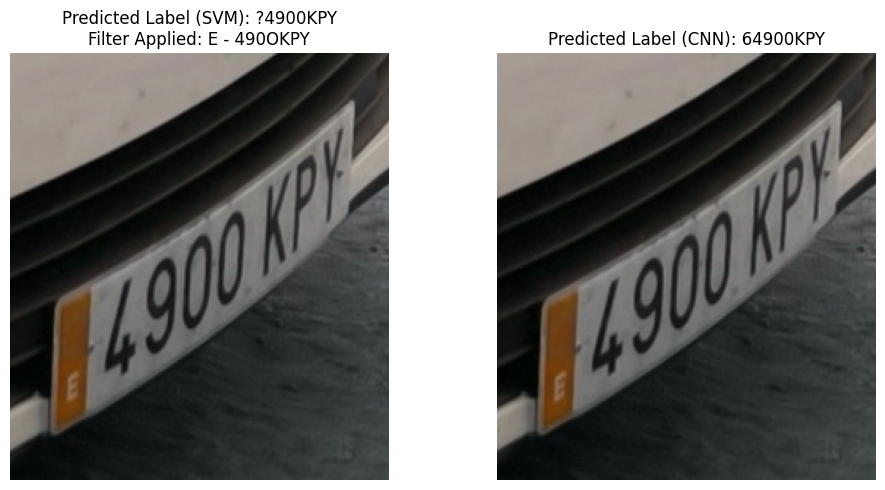

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
    
axes[0].imshow(car, cmap='gray')
axes[0].set_title(f"Predicted Label (SVM): {plate_sol}\nFilter Applied: {filter_plate}")
axes[0].axis('off')  

axes[1].imshow(car, cmap='gray')
axes[1].set_title(f"Predicted Label (CNN): {predicted_plate}")
axes[1].axis('off')  

"""axes[2].imshow(car, cmap='gray')
axes[2].set_title(f"Predicted Label (EasyOCR): {license_plate_text}")
axes[3].axis('off') """ 

plt.tight_layout()
plt.show()

## API PART

In [34]:
#api.api_car_model(predicted_plate)

STATE: 200
RESPONSE: <?xml version="1.0" encoding="utf-8"?><soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema"><soap:Body><CheckSpainResponse xmlns="http://regcheck.org.uk"><CheckSpainResult><vehicleJson>{
  "Description": "CITROEN C3",
  "CarMake": {
    "CurrentTextValue": "CITROEN"
  },
  "CarModel": {
    "CurrentTextValue": "C3"
  },
  "MakeDescription": {
    "CurrentTextValue": "CITROEN"
  },
  "ModelDescription": {
    "CurrentTextValue": "C3"
  },
  "EngineSize": "1199",
  "VehicleIdentificationNumber": null,
  "RegistrationYear": "2023",
  "RegistrationDate": "15/06/2023",
  "Variation": "1.2 PURETECH 83 FEEL",
  "Seats": null,
  "VariantType": "Gasolina 1199 cc 5 puertas",
  "VehicleType": "Car",
  "Fuel": "Gasolina",
  "IndicativePrice": null,
  "Doors": "5",
  "AllTerain": null,
  "KType": null,
  "ImageUrl": "http://matriculaapi.com/image.aspx/@Q0lUUk9FTiBD

In [6]:
path = "G://.shortcut-targets-by-id//1xjrivG-T7lph1wnu1KGxnsESEs0U5vvV//LICENSE_PLATES_RECOGITION_L&V//Dataset Characters"
output_file = "folder_counts.csv"
r.count_files_in_folders(path, output_file)

Data has been saved to folder_counts.csv
